## Evaluation Project 6 - Loan Application Status Prediction

### Problem Statement

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

##### Independent Variables:

- Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases.
- Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
- Married - This refers to applicant being in a state of matrimony
- Dependents - This refres to persons who depends on the applicants for survival
- Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
- Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
- Applicant Income - This refers to disposable income available for the applicant's use under State law.
- CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
- Loan_Amount - This refers to the amount of money an applicant owe at any given time.
- Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
- Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
- Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
- Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


We have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

##### IMPORTING REQUIRED LIBARIES FOR EDA, DATA CLEANING AND WRANGLING

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import codecs
from sklearn.model_selection import train_test_split

#### IMPORTING CSV FILE TO JUPYTER NOTEBOOK

In [3]:
la_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
la_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [57]:
print('Number of Rows : ',la_df.shape[0])
print('Number of Columns : ',la_df.shape[1])

Number of Rows :  614
Number of Columns :  13


In [58]:
la_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [59]:
la_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [60]:
la_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### DataType Check

In [61]:
la_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- In a Loan Application Status dataset we have 614 rows with 13 columns including target variable.
- A Target Variable is 'Loan_Status' having object datatype and it is categorical variable.
- Gender, Married, Educational, Self-Employed, Credit History, Loan Status are categorical features.
- There are three types of datatype : 
  - float64(4)
  - int64(1)
  - object(8)

In [62]:
la_df.columns.to_series().groupby(la_df.dtypes).groups

{int64: ['ApplicantIncome'], float64: ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'], object: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']}

### Statistical Analysis

In [63]:
la_df.duplicated().sum()

0

In [64]:
la_df.isin([' ','NA','-']).sum().any()

False

- No Duplicate entry in Dataset
- No Whitespace, NA,'-' exist in dataset

### Checking Missing Values

In [65]:
la_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [66]:
la_df.isnull().sum().sum()

149

<Axes: >

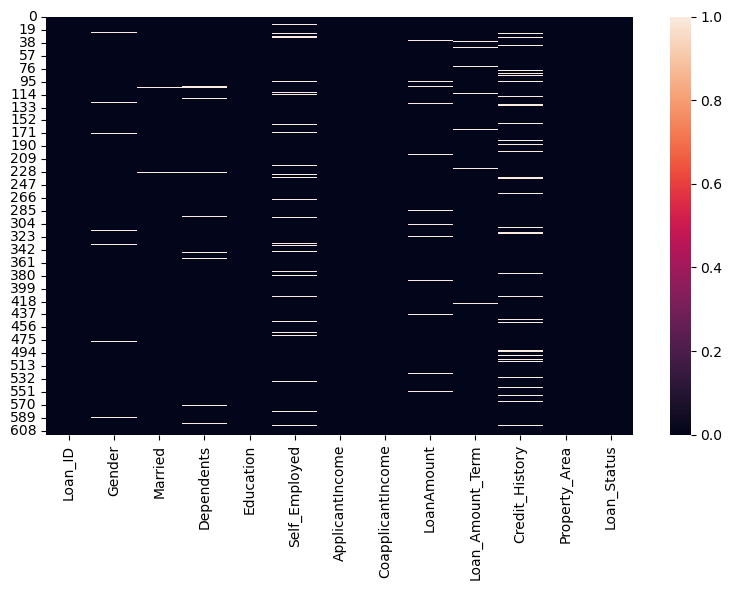

In [67]:
plt.figure(figsize=(8,6))
sns.heatmap(la_df.isnull())

In [68]:
missing_values=la_df.isnull().sum().sort_values(ascending=False)
percentage_missing_values=(missing_values/len(la_df))*100
print(pd.concat([missing_values,percentage_missing_values],axis=1,keys=['Missing Values', '%Missing Data']))

                   Missing Values  %Missing Data
Credit_History                 50       8.143322
Self_Employed                  32       5.211726
LoanAmount                     22       3.583062
Dependents                     15       2.442997
Loan_Amount_Term               14       2.280130
Gender                         13       2.117264
Married                         3       0.488599
Loan_ID                         0       0.000000
Education                       0       0.000000
ApplicantIncome                 0       0.000000
CoapplicantIncome               0       0.000000
Property_Area                   0       0.000000
Loan_Status                     0       0.000000


- 7 out 13 columns contains missing values.
- Small amount of data is missing , so we can use Mean and Mode to replace with NaN values.

### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [69]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(la_df[i].value_counts())
    print('='*100)

Gender
Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Loan_Amount_Term
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Credit_History
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64


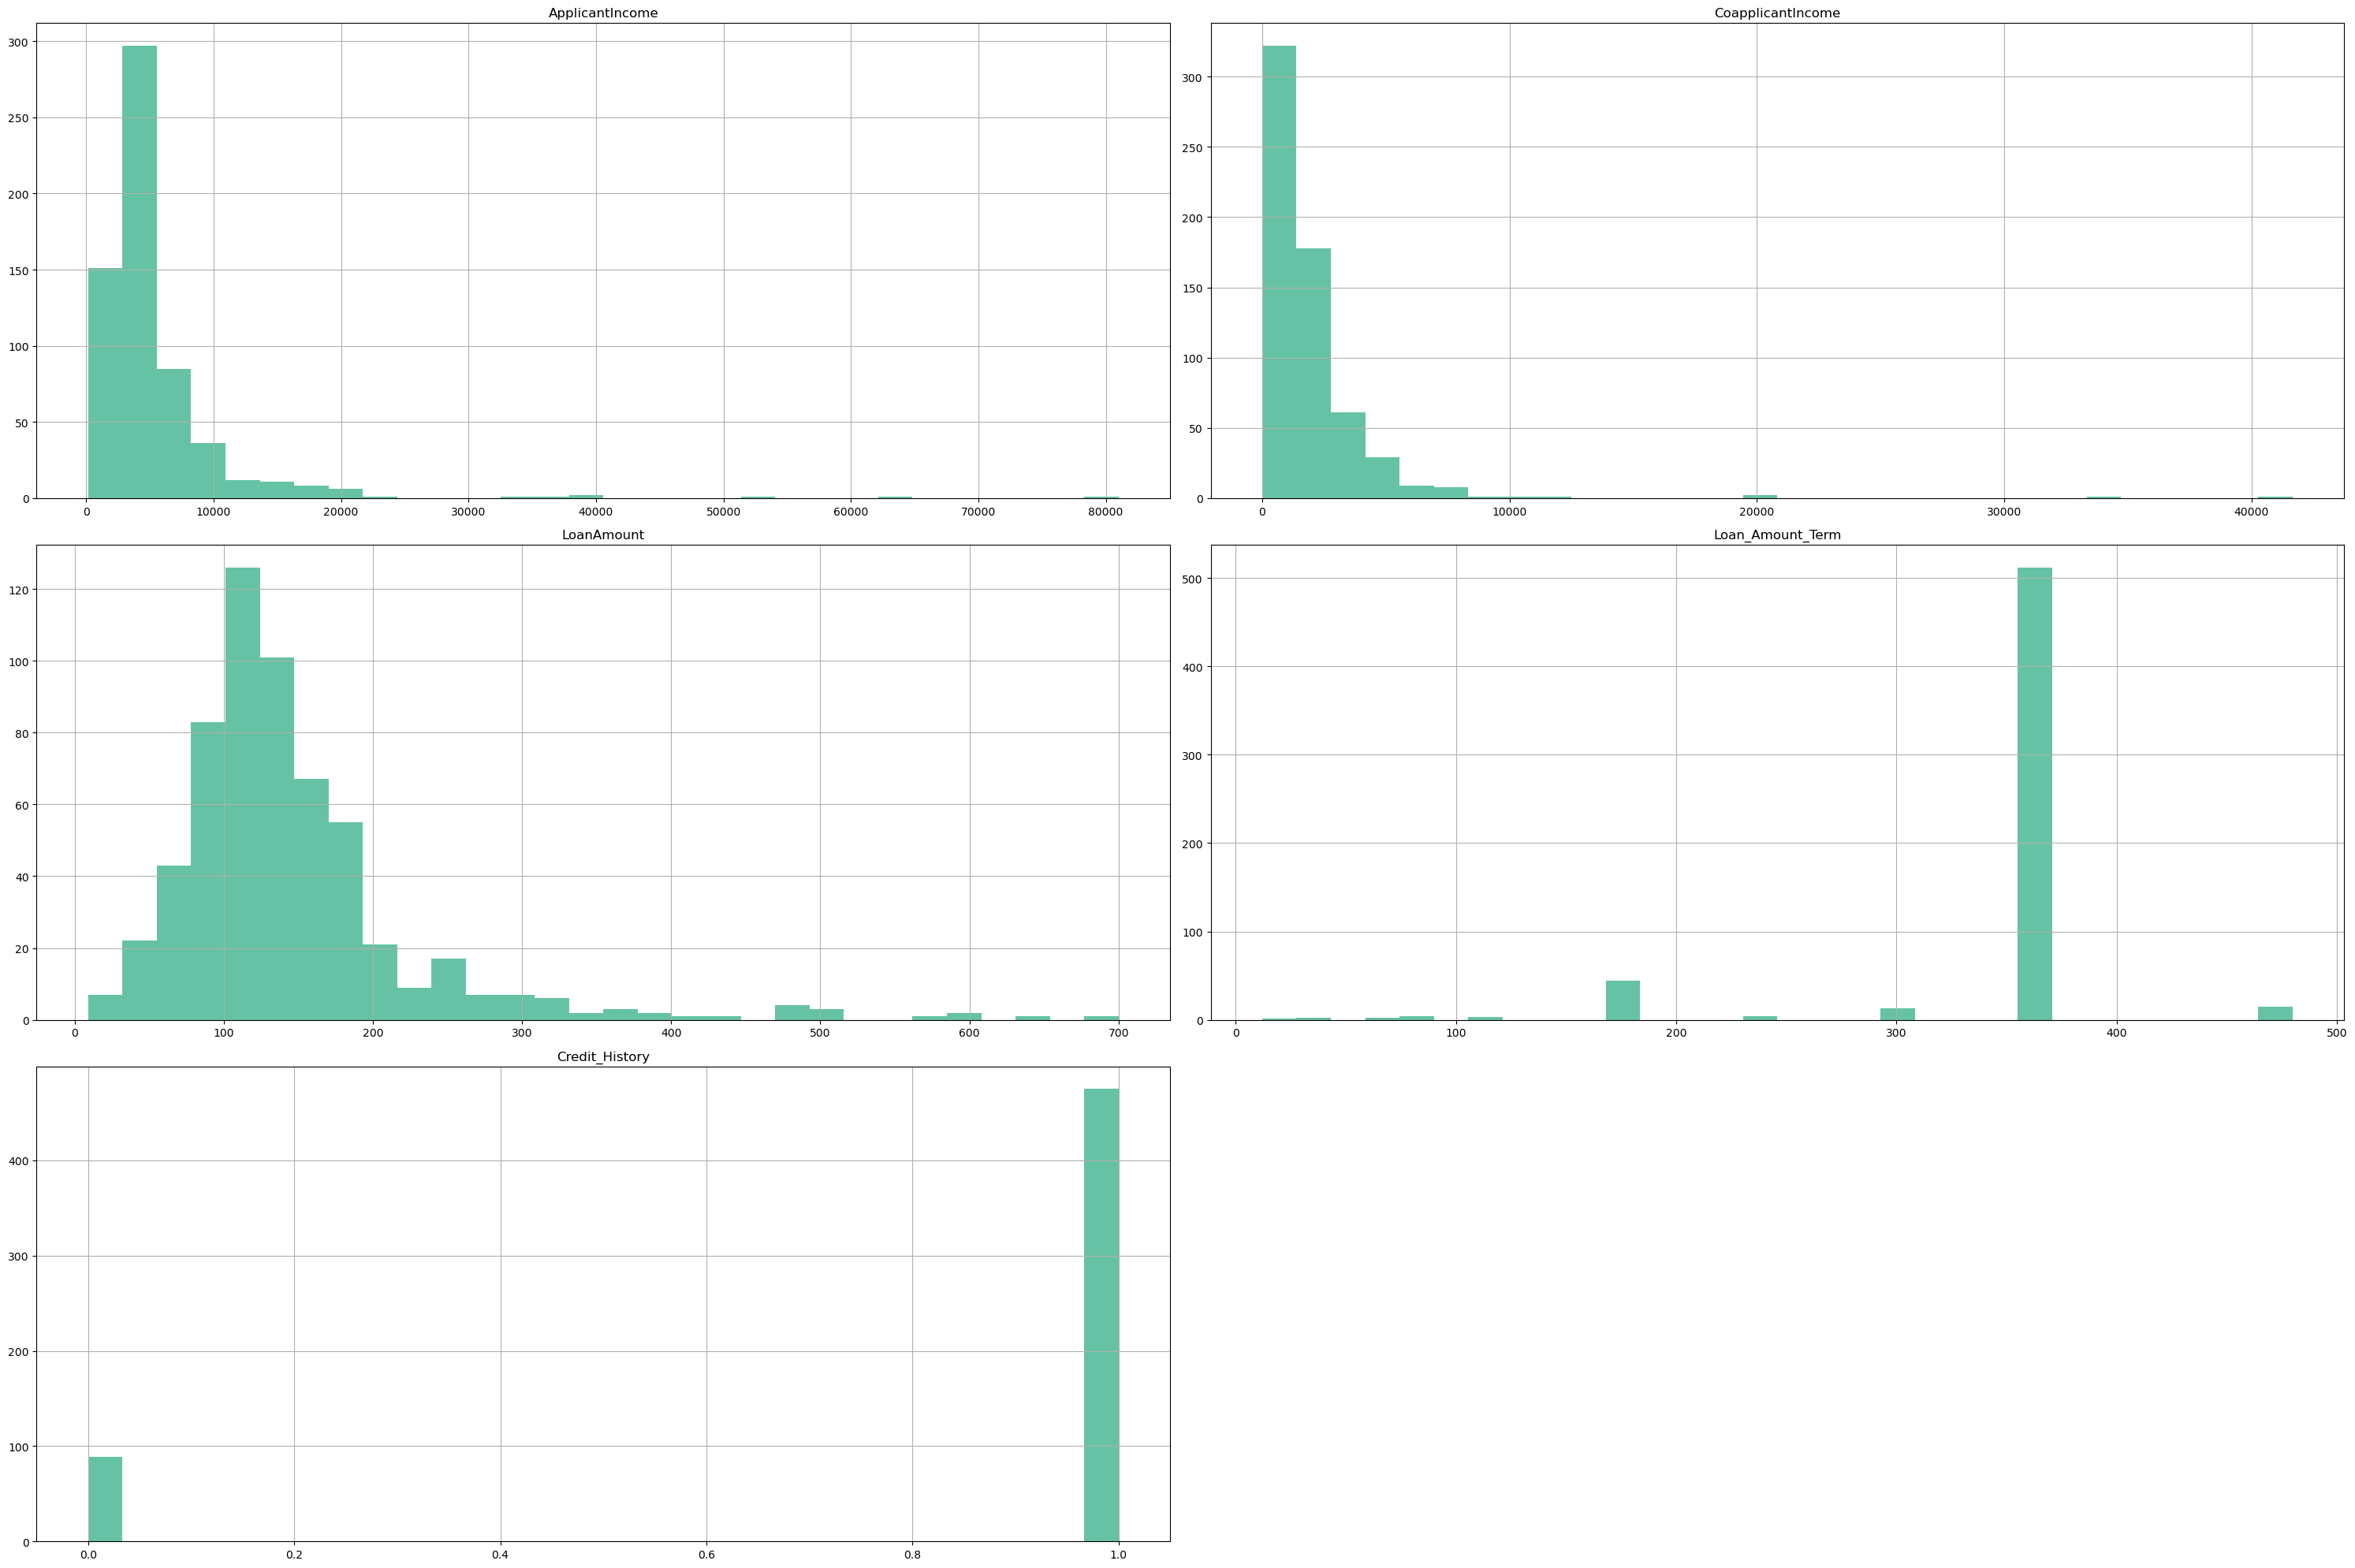

In [70]:
la_df.hist(bins = 30,figsize=(30,20))
plt.show()

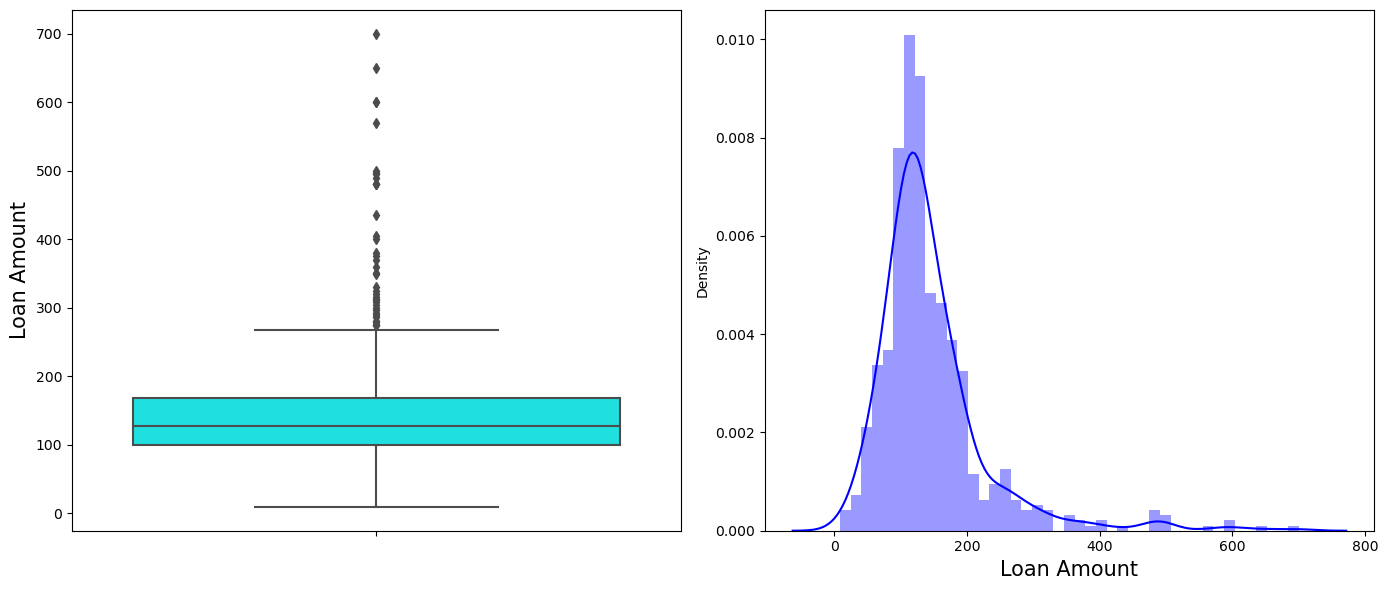

In [71]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=la_df,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(la_df['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

In [72]:
print("Mean of Loan Amount:",la_df['LoanAmount'].mean())
print("Median of Loan Amount:",la_df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


- The mean is greater than median loan amount.
- Clearly we can see outliers in boxplot and feature is strecth to far in distribution plot.

### Imputation of Missing Values

##### Imputation Details:

- Missing values in Loan amount is impute with median value.
- Maximum Loan term is 360 Months so Missing value in Loan amount term is replace with 360 Months.
- Credit History, Self Employed, dependents, Gender and Married are replace with mode of repective features.

In [73]:
la_df['Credit_History'].fillna(la_df['Credit_History'].mode()[0],inplace=True)
la_df['Self_Employed'].fillna(la_df['Self_Employed'].mode()[0],inplace=True)
la_df['Dependents'].fillna(la_df['Dependents'].mode()[0], inplace=True)
la_df['Gender'].fillna(la_df['Gender'].mode()[0],inplace=True)
la_df['Married'].fillna(la_df['Married'].mode()[0],inplace=True)

la_df['Loan_Amount_Term'].fillna(la_df['Loan_Amount_Term'].mode()[0],inplace=True)
la_df['LoanAmount'].fillna(la_df['LoanAmount'].median(), inplace=True)

### Checking Missing Values after Imputation

In [74]:
missing_values = la_df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(la_df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


No Missing Values

### Statistical Matrix

<Axes: >

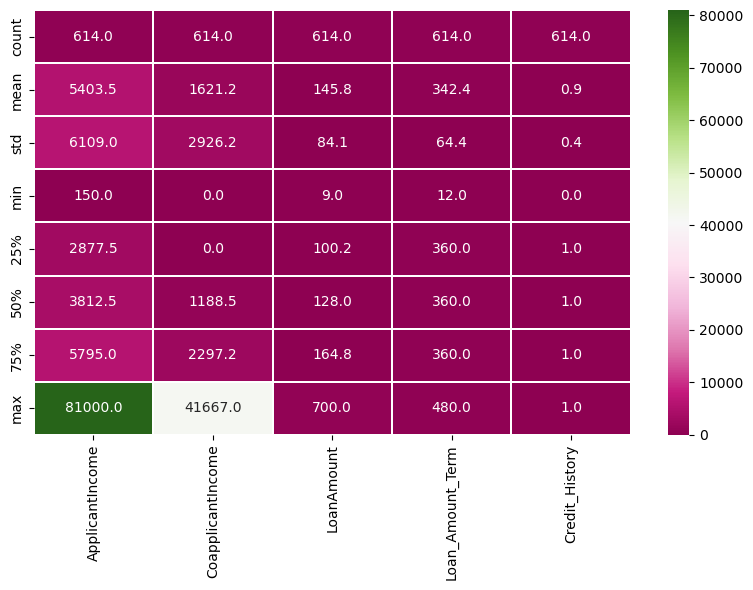

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(la_df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [22]:
la_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


- In Applicant Income & Coapplicant Income Std deviation value is greater than median. So data is spread and skewed.
- Taking 75% and Max rows into consideration we can surely say that Outliers exist in Applicant Income, Coapplicant Income,Loan Amount.
- Since Credit History is Categorical variable there is no significance in different statstical parameter of it.
- Minimum Tenure for Loan is 12 Months and Maximum Loan tenure is 480 Months.
- Minimum Applicant income is 150 and maximum is 81000.

### Target Variable

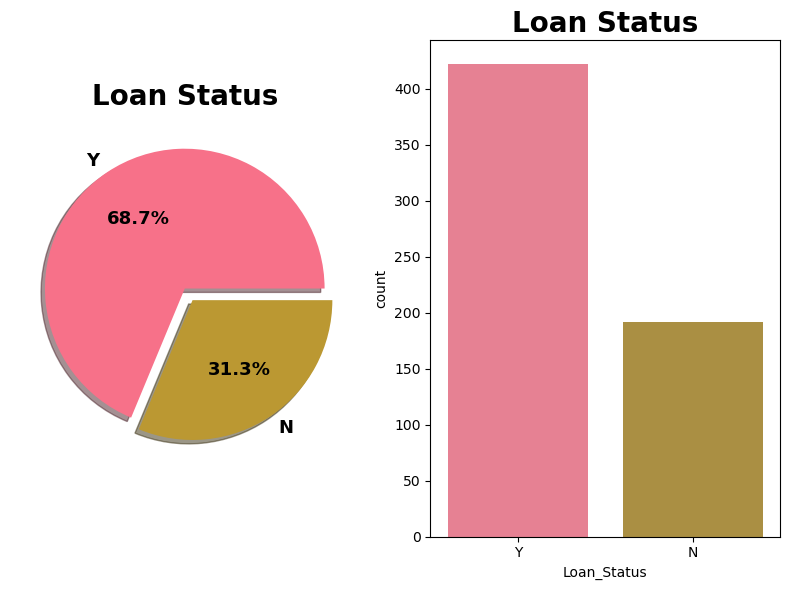

In [76]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(8,6))
la_df['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Loan Status', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
ax[1] = sns.countplot(x = 'Loan_Status', data = la_df)
ax[1].set_title('Loan Status',fontsize=20,fontweight ='bold')
plt.show()

- 68.7% Applicants gets loan Approval.
- We can see that dataset is imbalanced in nature.

### Gender Vs Loan Status

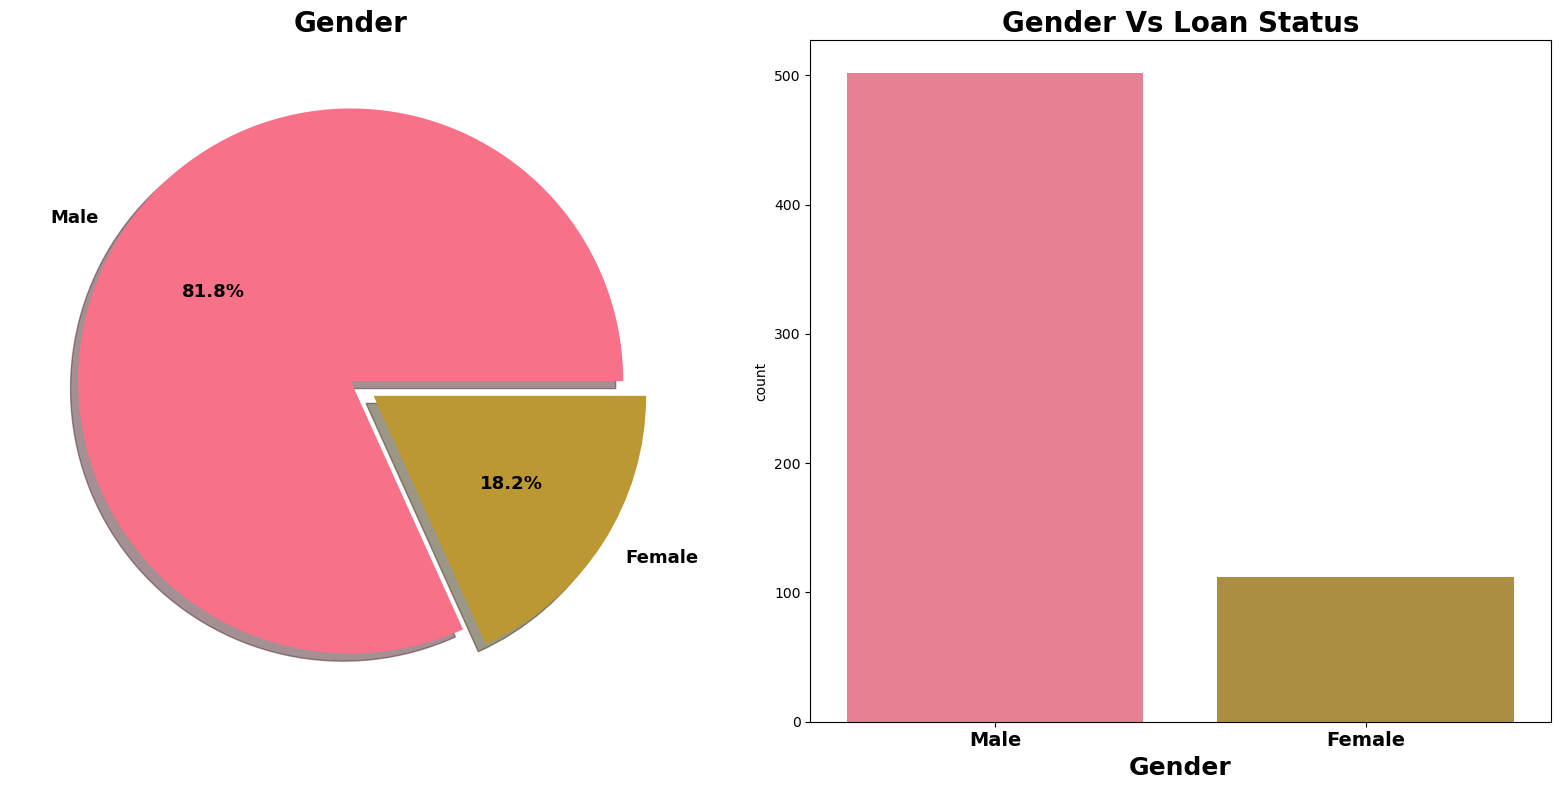

In [77]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
la_df['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
ax[1] = sns.countplot(x = 'Gender', data = la_df)
ax[1].set_title('Gender Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Gender",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [78]:
pd.crosstab(la_df['Gender'],la_df["Loan_Status"], margins=True).style.background_gradient(cmap='Greens')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


- 81.8% Applicant are male.
- Irrespective Gender 65 % Applicant from each gender gets loan approval.It means that gender doesnot play any role loan approval. No Discrimation on name of Gender done.

### Married Vs Loan Status

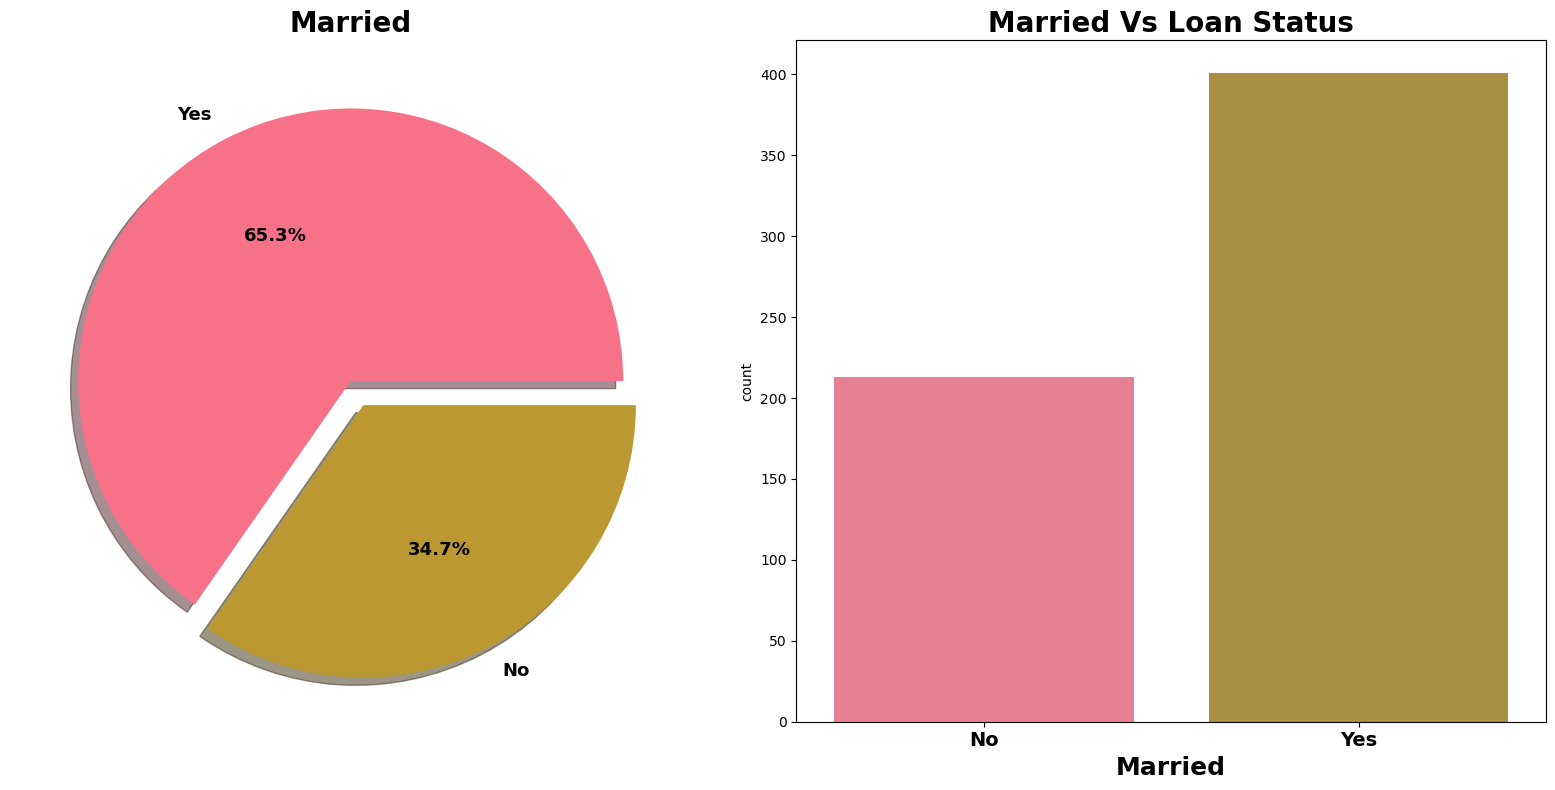

In [79]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
la_df['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Married', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
ax[1] = sns.countplot(x = 'Married', data = la_df)
ax[1].set_title('Married Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Married",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [80]:
pd.crosstab([la_df['Gender'],la_df['Married']],[la_df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

- 65.3 % loan applicants are married. We can see from Count plot that Married people have more possibility of getting loan approval.
- But Here comes Interesting observation from crosstab :
  - Unmarried Women are more chances of getting loan approval compare to married women.We will try to find which factor actually play deciding role here like education, employeement or Income.
  - Married Men are more chances of loan approval.

#### Checking Number Dependancy

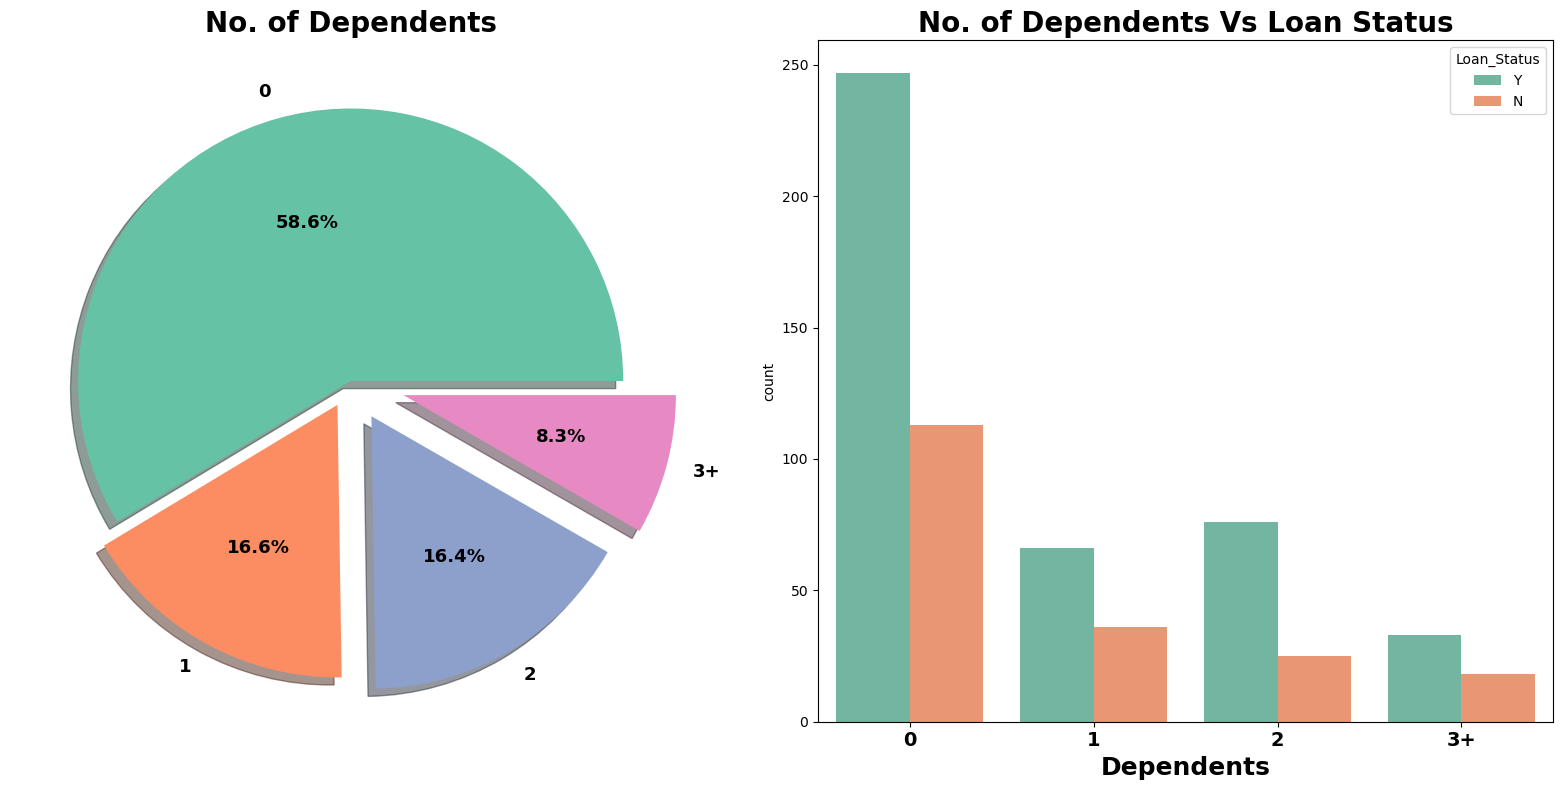

In [81]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(16,8))
la_df['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No. of Dependents', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
ax[1] = sns.countplot(x = 'Dependents', data = la_df,hue='Loan_Status')
ax[1].set_title('No. of Dependents Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [82]:
pd.crosstab([la_df['Dependents']],[la_df.Loan_Status,la_df['Gender']],margins=True).style.background_gradient(cmap='Blues')

In [83]:
pd.crosstab([la_df['Dependents'],la_df['Gender']],[la_df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

- 58.6% Applicants have no dependents on them.33% Applicants have either 1 or 2 dependents. It will interesting check whether with increase in number dependents their is increase in requirement loan amount.
- Female having zero dependents have more chances to get loan approval compare to Females with dependents.
- For male Maximum loan approval comes with 0 dependents followed by 2 dependents.

In [84]:
la_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Education Vs Loan Status

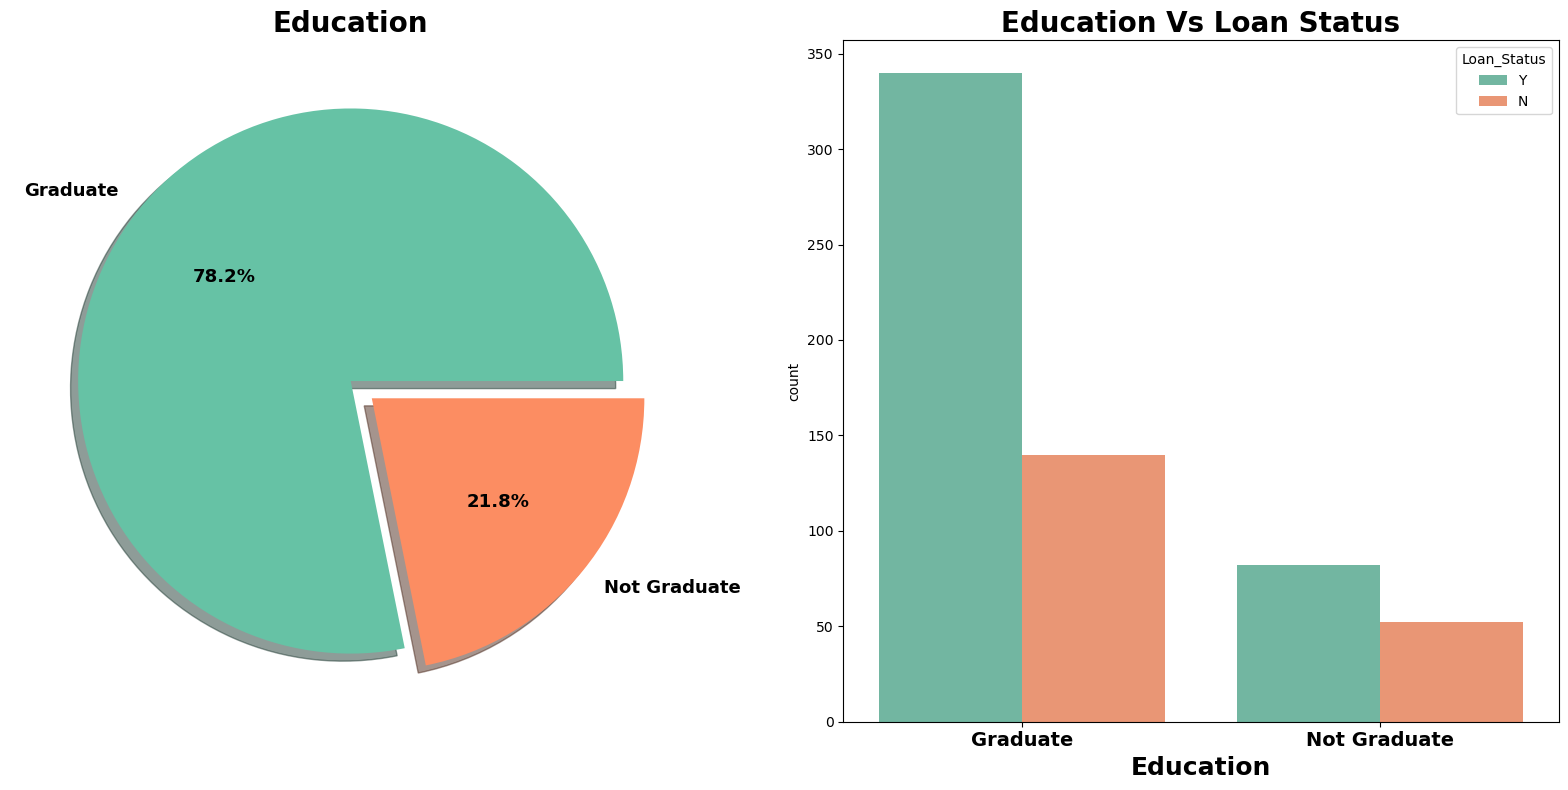

In [85]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(16,8))
la_df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Education', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
ax[1] = sns.countplot(x = 'Education', data = la_df,hue='Loan_Status')
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [86]:
  pd.crosstab([la_df['Education'],la_df['Gender']],[la_df.Loan_Status],margins=True).style.background_gradient(cmap='Greens')

Graduate applicants are more likely to get loan approval irrespective gender.

## Encoding Categorical Data

In [87]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    la_df[i] = le.fit_transform(la_df[i])
la_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


## Feature Selection and Engineering

### 1. Outliers Detection and Removal

In [89]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

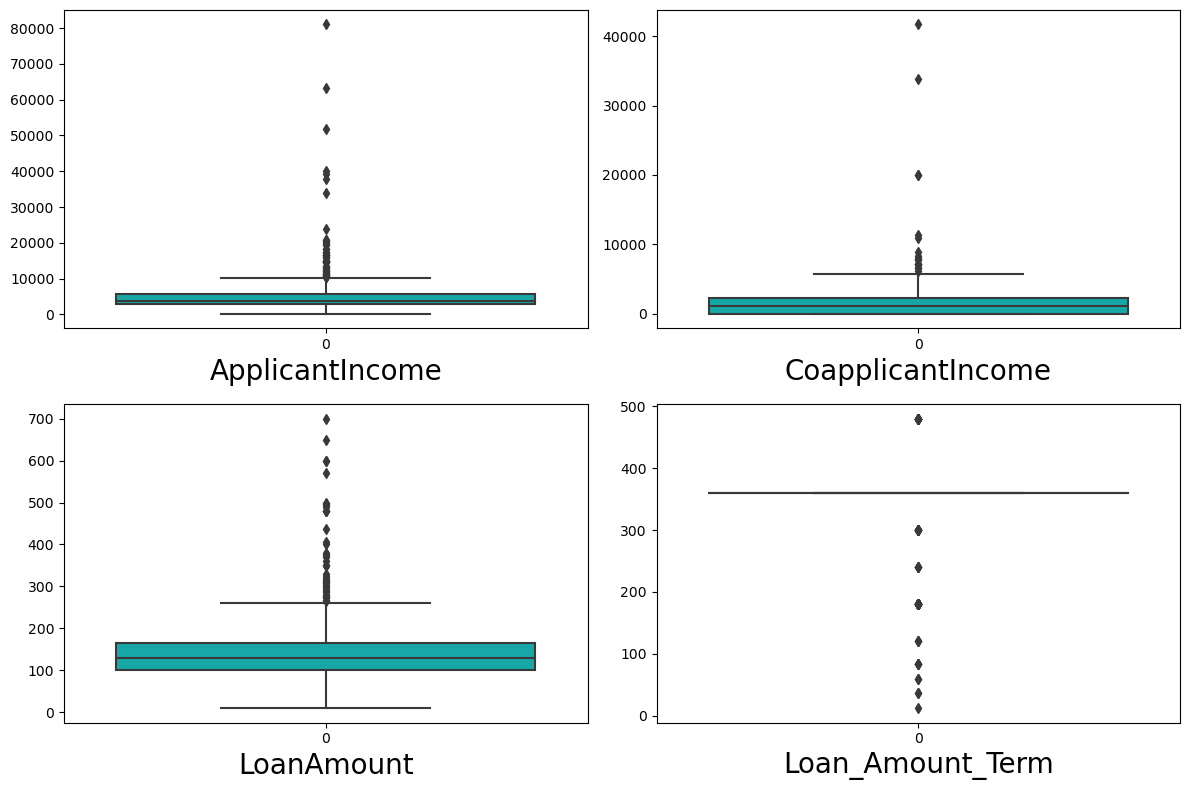

In [90]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(la_df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


In [91]:
la_df.drop(["Loan_ID"], axis=1, inplace=True)

In [92]:
la_df['Dependents'] = la_df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [93]:
la_df['Dependents'] =pd.to_numeric(la_df['Dependents'])

In [94]:
from scipy.stats import zscore
z = np.abs(zscore(la_df))
threshold = 3
la_df1 = la_df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", la_df.shape)
print ("Shape of the dataframe after removing outliers: ", la_df1.shape)
print ("Percentage of data loss post outlier removal: ", (la_df.shape[0]-la_df1.shape[0])/la_df.shape[0]*100)

la_df=la_df1.copy() 

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


In [95]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((614-577)/614)*100,'%')

Percentage Data Loss : 6.026058631921824 %


We are losing 6.02 % of data and which Acceptable.

### 2. Skewness of Features

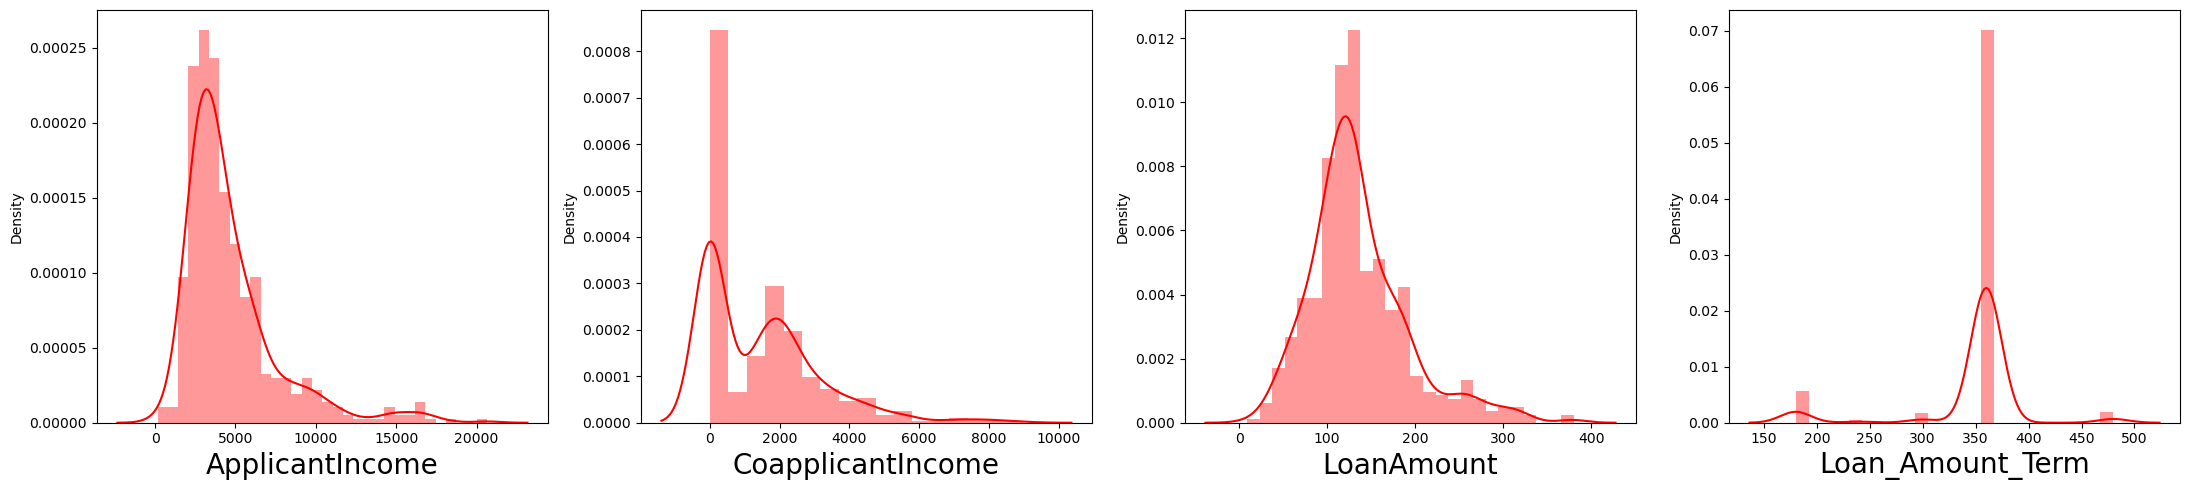

In [96]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(la_df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [97]:
la_df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

- Out of all above feature 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are skewed which are numerical feature.
- Other features are categorical in nature so skewness is nothing to do with these remaining feature.We will ignore them.
- We will yeo-johnson transformation method.

In [98]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [99]:
la_df[skew] = scaler.fit_transform(la_df[skew].values)
la_df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


###### Checking skewness after using yeo-johnson ethod

In [100]:
la_df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

For Numerical Variable skewness is within permissible limit.

### 3. Corrleation

In [101]:
la_df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


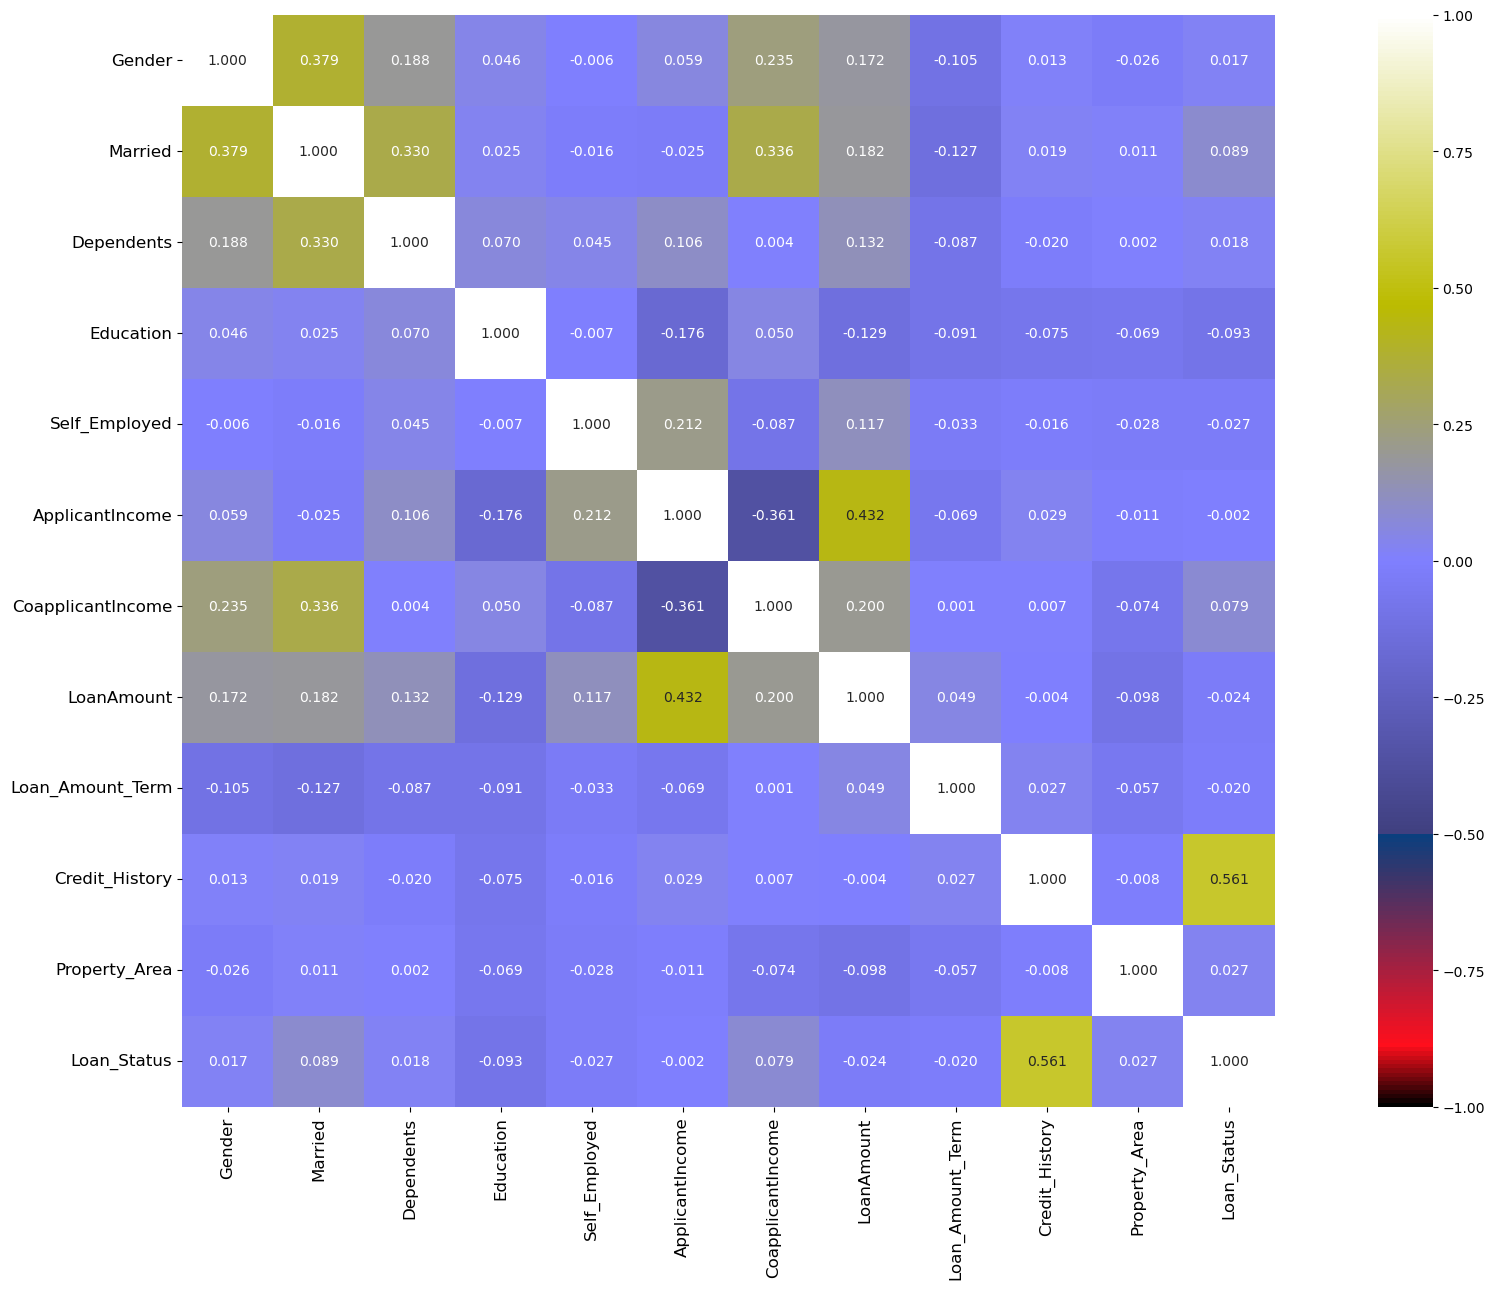

In [102]:
plt.figure(figsize=(21,13))
sns.heatmap(la_df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

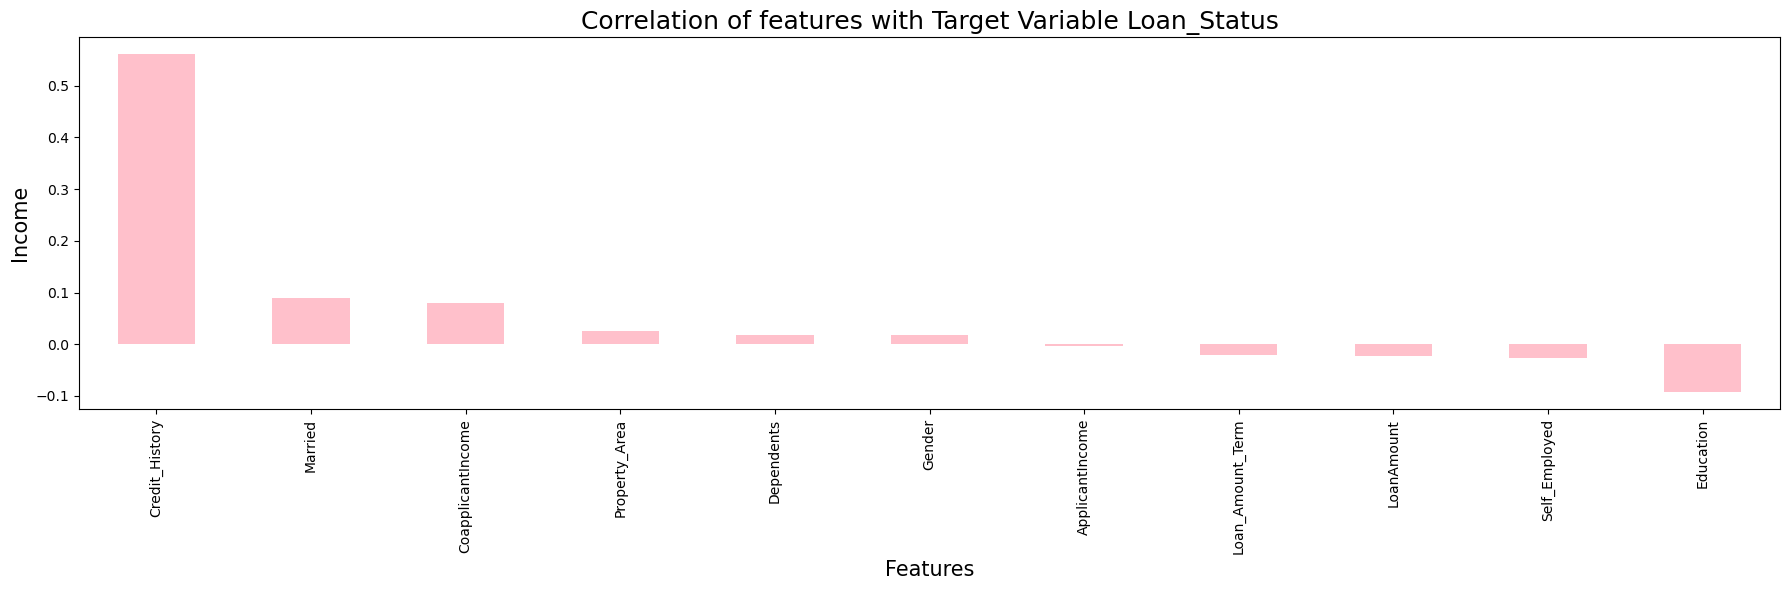

In [103]:
plt.figure(figsize = (18,6))
la_df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'pink')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

### 4. Checking Multicollinearity between features using variance_inflation_factor

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(la_df.values,i)
for i in range(la_df.shape[1])]
vif['Features']= la_df.columns
vif

,VIF,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


### 5. Balancing Imbalanced Target Features

In [105]:
la_df.Loan_Status.value_counts()

Loan_Status
1    398
0    179
Name: count, dtype: int64

### Balancing using SMOTE

In [106]:
from imblearn.over_sampling import SMOTE

In [107]:
X = la_df.drop(['Loan_Status'], axis =1)
Y = la_df['Loan_Status']

In [108]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [109]:
Y.value_counts()

Loan_Status
1    398
0    398
Name: count, dtype: int64

### Standard Scaling

In [110]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## Machine Learning Model Building

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (557, 11)
Training target vector size: (557,)
Test feature matrix size: (239, 11)
Test target vector size: (239,)


### Finding Best Random State

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8284518828451883 on Random_state 86


### Logistics Regression Model

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=78, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7866108786610879


Confusion matrix of Logistics Regression : 
 [[ 66  44]
 [  7 122]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.90      0.60      0.72       110
           1       0.73      0.95      0.83       129

    accuracy                           0.79       239
   macro avg       0.82      0.77      0.77       239
weighted avg       0.81      0.79      0.78       239



### Finding Optimal Value of n_neighbors for KNN

In [115]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.47091116165974684
RMSE value for k=  2 is: 0.5373108307770214
RMSE value for k=  3 is: 0.4664474480124446
RMSE value for k=  4 is: 0.5334030637818674
RMSE value for k=  5 is: 0.4883581921595791
RMSE value for k=  6 is: 0.5052030537546389
RMSE value for k=  7 is: 0.4664474480124446
RMSE value for k=  8 is: 0.5093272287453544
RMSE value for k=  9 is: 0.44814821218396267
RMSE value for k=  10 is: 0.4753329597178616
RMSE value for k=  11 is: 0.47091116165974684
RMSE value for k=  12 is: 0.4664474480124446
RMSE value for k=  13 is: 0.45738935374634826
RMSE value for k=  14 is: 0.4664474480124446
RMSE value for k=  15 is: 0.4664474480124446
RMSE value for k=  16 is: 0.45738935374634826
RMSE value for k=  17 is: 0.4664474480124446
RMSE value for k=  18 is: 0.47091116165974684
RMSE value for k=  19 is: 0.4753329597178616
RMSE value for k=  20 is: 0.4883581921595791
RMSE value for k=  21 is: 0.47971400126799746
RMSE value for k=  22 is: 0.4753329597178616
RMSE value f

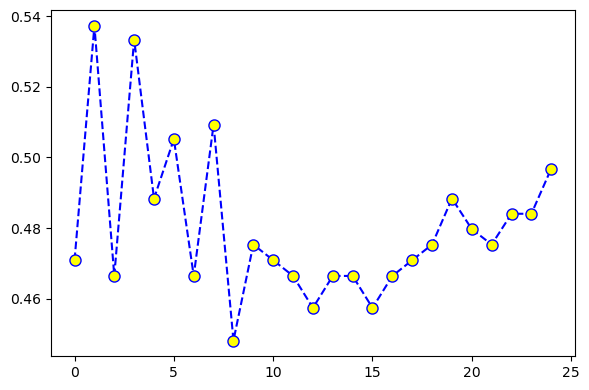

In [116]:
plt.figure(figsize = (6,4))
plt.plot(range(25), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=8)

### Applying Other Classification Algorithm

In [117]:
from sklearn.metrics import roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.7866108786610879


Confusion matrix : 
 [[ 75  35]
 [ 16 113]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.68      0.75       110
           1       0.76      0.88      0.82       129

    accuracy                           0.79       239
   macro avg       0.79      0.78      0.78       239
weighted avg       0.79      0.79      0.78       239





TypeError: roc_curve() takes 2 positional arguments but 3 were given

## CrossValidation:

In [118]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.66875    0.72327044 0.77987421 0.77358491 0.77987421]
Mean Score : 0.7450707547169811
Std deviation : 0.043670881943803454




Cross Validation Score SVC() :

Score : [0.71875    0.72327044 0.82389937 0.77987421 0.79874214]
Mean Score : 0.7689072327044025
Std deviation : 0.04155236785260813




Cross Validation Score GaussianNB() :

Score : [0.6875     0.71069182 0.79874214 0.77358491 0.78616352]
Mean Score : 0.7513364779874214
Std deviation : 0.04400521785660937




Cross Validation Score DecisionTreeClassifier() :

Score : [0.7125     0.68553459 0.79874214 0.77358491 0.7672956 ]
Mean Score : 0.7475314465408806
Std deviation : 0.04186347255356524




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.74375    0.69811321 0.77358491 0.71698113 0.74842767]
Mean Score : 0.7361713836477988
Std deviation : 0.026169119994073016




Cross Validation Score RandomForestClassifier() :

Score : [0.8        0.7672956

## Hyper Parameter Tuning : GridSearchCV

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [121]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.723 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.741 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.739 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.739 total time=   0.0s
[CV 5

[CV 4/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.721 total time=   0.0s
[CV 5/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 5/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.721 total time=   0.0s
[CV 1/5; 10/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=15
[CV 1/5; 10/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=15;, score=0.759 total time=   0.0s
[CV 2/5; 10/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=15
[CV 2/5; 10/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=15;, score=0.795 total time=   0.0s
[CV 3/5; 10/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=15
[CV 3/5; 10/168] END bootstrap=True, criterion=gini, ma

[CV 3/5; 17/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15;, score=0.793 total time=   0.0s
[CV 4/5; 17/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15
[CV 4/5; 17/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15;, score=0.766 total time=   0.0s
[CV 5/5; 17/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15
[CV 5/5; 17/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15;, score=0.784 total time=   0.0s
[CV 1/5; 18/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=25
[CV 1/5; 18/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=25;, score=0.750 total time=   0.0s
[CV 2/5; 18/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=25
[CV 2/5; 18/168] END bootstrap=True, criteri

[CV 3/5; 24/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15;, score=0.784 total time=   0.0s
[CV 4/5; 24/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15
[CV 4/5; 24/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15;, score=0.757 total time=   0.0s
[CV 5/5; 24/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15
[CV 5/5; 24/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15;, score=0.757 total time=   0.0s
[CV 1/5; 25/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25
[CV 1/5; 25/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25;, score=0.723 total time=   0.0s
[CV 2/5; 25/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25
[CV 2/5; 25/168] END bootstrap=True, criteri

[CV 3/5; 31/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15;, score=0.802 total time=   0.0s
[CV 4/5; 31/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15
[CV 4/5; 31/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15;, score=0.784 total time=   0.0s
[CV 5/5; 31/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15
[CV 5/5; 31/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15;, score=0.748 total time=   0.0s
[CV 1/5; 32/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25
[CV 1/5; 32/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25;, score=0.768 total time=   0.0s
[CV 2/5; 32/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25
[CV 2/5; 32/168] END bootstrap=True, criteri

[CV 3/5; 38/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15;, score=0.811 total time=   0.0s
[CV 4/5; 38/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15
[CV 4/5; 38/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15;, score=0.739 total time=   0.0s
[CV 5/5; 38/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15
[CV 5/5; 38/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15;, score=0.748 total time=   0.0s
[CV 1/5; 39/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25
[CV 1/5; 39/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25;, score=0.723 total time=   0.0s
[CV 2/5; 39/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25
[CV 2/5; 39/168] END bootstrap=True, criteri

[CV 3/5; 45/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.757 total time=   0.0s
[CV 4/5; 45/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15
[CV 4/5; 45/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.784 total time=   0.0s
[CV 5/5; 45/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15
[CV 5/5; 45/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.748 total time=   0.0s
[CV 1/5; 46/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=25
[CV 1/5; 46/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=25;, score=0.768 total time=   0.0s
[CV 2/5; 46/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=25
[CV 2/5; 46/168] END bootstrap=True, criteri

[CV 3/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.793 total time=   0.0s
[CV 4/5; 52/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15
[CV 4/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.766 total time=   0.0s
[CV 5/5; 52/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15
[CV 5/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.703 total time=   0.0s
[CV 1/5; 53/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 1/5; 53/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.723 total time=   0.0s
[CV 2/5; 53/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 2/5; 53/168] END bootstrap=True, criteri

[CV 3/5; 59/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15;, score=0.784 total time=   0.0s
[CV 4/5; 59/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15
[CV 4/5; 59/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15;, score=0.775 total time=   0.0s
[CV 5/5; 59/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15
[CV 5/5; 59/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15;, score=0.775 total time=   0.0s
[CV 1/5; 60/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25
[CV 1/5; 60/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25;, score=0.732 total time=   0.0s
[CV 2/5; 60/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25
[CV 2/5; 60/168] END bootstrap=True, criteri

[CV 4/5; 66/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.784 total time=   0.0s
[CV 5/5; 66/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15
[CV 5/5; 66/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.784 total time=   0.0s
[CV 1/5; 67/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25
[CV 1/5; 67/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.723 total time=   0.0s
[CV 2/5; 67/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25
[CV 2/5; 67/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.786 total time=   0.0s
[CV 3/5; 67/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25
[CV 3/5; 67/168] END bootstrap=True, criteri

[CV 2/5; 74/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25;, score=0.768 total time=   0.0s
[CV 3/5; 74/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25
[CV 3/5; 74/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25;, score=0.838 total time=   0.0s
[CV 4/5; 74/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25
[CV 4/5; 74/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25;, score=0.766 total time=   0.0s
[CV 5/5; 74/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25
[CV 5/5; 74/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25;, score=0.766 total time=   0.0s
[CV 1/5; 75/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=50
[CV 1/5; 75/168] END bootstrap=True, criteri

[CV 3/5; 81/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.829 total time=   0.0s
[CV 4/5; 81/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25
[CV 4/5; 81/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.793 total time=   0.0s
[CV 5/5; 81/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25
[CV 5/5; 81/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.784 total time=   0.0s
[CV 1/5; 82/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50
[CV 1/5; 82/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50;, score=0.777 total time=   0.1s
[CV 2/5; 82/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50
[CV 2/5; 82/168] END bootstrap=True, criteri

[CV 3/5; 88/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=25;, score=0.829 total time=   0.0s
[CV 4/5; 88/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=25
[CV 4/5; 88/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=25;, score=0.739 total time=   0.0s
[CV 5/5; 88/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=25
[CV 5/5; 88/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=25;, score=0.766 total time=   0.0s
[CV 1/5; 89/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50
[CV 1/5; 89/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50;, score=0.750 total time=   0.1s
[CV 2/5; 89/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50
[CV 2/5; 89/168] END bootstr

[CV 3/5; 95/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.802 total time=   0.0s
[CV 4/5; 95/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25
[CV 4/5; 95/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.757 total time=   0.0s
[CV 5/5; 95/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25
[CV 5/5; 95/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.757 total time=   0.0s
[CV 1/5; 96/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50
[CV 1/5; 96/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50;, score=0.741 total time=   0.1s
[CV 2/5; 96/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50
[CV 2/5; 96/168] END bootstr

[CV 2/5; 102/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25;, score=0.812 total time=   0.0s
[CV 3/5; 102/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25
[CV 3/5; 102/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25;, score=0.784 total time=   0.0s
[CV 4/5; 102/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25
[CV 4/5; 102/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25;, score=0.748 total time=   0.0s
[CV 5/5; 102/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25
[CV 5/5; 102/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25;, score=0.775 total time=   0.0s
[CV 1/5; 103/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50
[CV 1/5; 103

[CV 2/5; 109/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25;, score=0.795 total time=   0.0s
[CV 3/5; 109/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25
[CV 3/5; 109/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25;, score=0.811 total time=   0.0s
[CV 4/5; 109/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25
[CV 4/5; 109/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25;, score=0.757 total time=   0.0s
[CV 5/5; 109/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25
[CV 5/5; 109/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25;, score=0.739 total time=   0.0s
[CV 1/5; 110/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50
[CV 1/5; 110

[CV 2/5; 116/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25;, score=0.750 total time=   0.0s
[CV 3/5; 116/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25
[CV 3/5; 116/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25;, score=0.820 total time=   0.0s
[CV 4/5; 116/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25
[CV 4/5; 116/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25;, score=0.802 total time=   0.0s
[CV 5/5; 116/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25
[CV 5/5; 116/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25;, score=0.739 total time=   0.0s
[CV 1/5; 117/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50
[CV 1/5; 117

[CV 2/5; 123/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25;, score=0.777 total time=   0.0s
[CV 3/5; 123/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25
[CV 3/5; 123/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25;, score=0.820 total time=   0.0s
[CV 4/5; 123/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25
[CV 4/5; 123/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25;, score=0.775 total time=   0.0s
[CV 5/5; 123/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25
[CV 5/5; 123/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25;, score=0.739 total time=   0.0s
[CV 1/5; 124/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50
[CV 1/5; 124

[CV 1/5; 130/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25;, score=0.759 total time=   0.0s
[CV 2/5; 130/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25
[CV 2/5; 130/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25;, score=0.750 total time=   0.0s
[CV 3/5; 130/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25
[CV 3/5; 130/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25;, score=0.757 total time=   0.0s
[CV 4/5; 130/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25
[CV 4/5; 130/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25;, score=0.784 total time=   0.0s
[CV 5/5; 130/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25
[CV 5/5; 130

[CV 2/5; 137/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.795 total time=   0.0s
[CV 3/5; 137/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25
[CV 3/5; 137/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.793 total time=   0.0s
[CV 4/5; 137/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25
[CV 4/5; 137/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.775 total time=   0.0s
[CV 5/5; 137/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25
[CV 5/5; 137/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.766 total time=   0.0s
[CV 1/5; 138/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50
[CV 1/5; 138

[CV 2/5; 144/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25;, score=0.777 total time=   0.0s
[CV 3/5; 144/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25
[CV 3/5; 144/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25;, score=0.802 total time=   0.0s
[CV 4/5; 144/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25
[CV 4/5; 144/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25;, score=0.784 total time=   0.0s
[CV 5/5; 144/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25
[CV 5/5; 144/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25;, score=0.766 total time=   0.0s
[CV 1/5; 145/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=50
[CV 1/5; 145

[CV 2/5; 151/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25;, score=0.768 total time=   0.0s
[CV 3/5; 151/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25
[CV 3/5; 151/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25;, score=0.793 total time=   0.0s
[CV 4/5; 151/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25
[CV 4/5; 151/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25;, score=0.802 total time=   0.0s
[CV 5/5; 151/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25
[CV 5/5; 151/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25;, score=0.793 total time=   0.0s
[CV 1/5; 152/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50
[CV 1/5; 152

[CV 2/5; 158/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.795 total time=   0.0s
[CV 3/5; 158/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25
[CV 3/5; 158/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.811 total time=   0.0s
[CV 4/5; 158/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25
[CV 4/5; 158/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.793 total time=   0.0s
[CV 5/5; 158/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25
[CV 5/5; 158/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.793 total time=   0.0s
[CV 1/5; 159/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50
[CV 1/5; 159

[CV 2/5; 165/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.759 total time=   0.0s
[CV 3/5; 165/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25
[CV 3/5; 165/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.811 total time=   0.0s
[CV 4/5; 165/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25
[CV 4/5; 165/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.811 total time=   0.0s
[CV 5/5; 165/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25
[CV 5/5; 165/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.757 total time=   0.0s
[CV 1/5; 166/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=50
[CV 1/5; 166

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [122]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'log2',
 'n_estimators': 70}

## Final Model

In [123]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 50, max_depth=20 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8493723849372385


In [ ]:
from sklearn.metrics import roc_curve

disp = roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

### Saving Model

In [129]:
import joblib
joblib.dump(Final_mod,'Loan_Status_Final.pkl')

['Loan_Status_Final.pkl']